# Homework 2 - Data from the Web

# Task 1 - QS World Universities ranking

### Importing libs

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


import requests
from bs4 import BeautifulSoup
import difflib

import json

## Extracting data from the website "topuniversities.com"

The aim of the first task is to scrape meaningful data from _topuniversities.com_ website.
The first approach we have is to analyze the content and the interaction with the html table on the website. 

![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")
By analyzing all the REST request loaded by the page we found that the dataset that fills the table is obtained by a GET request to a specific URL in a .txt format.

Analyzing the file we see that the content is stored in a JSON format. Now, we know that we can perform the same request and store the file in a json object that can be used to create our pandas dataframe.

In [2]:
default_path = 'https://www.topuniversities.com'
r = requests.get(default_path +'/sites/default/files/qs-rankings-data/357051.txt?_=1507995842896')
result_json = r.json()

result = pd.DataFrame.from_dict(result_json['data']).head(200)

In [3]:
result

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford
6,GB,365,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294014,7,Europe,94.6,None,UCL (University College London),/universities/ucl-university-college-london
7,GB,356,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294030,8,Europe,93.7,None,Imperial College London,/universities/imperial-college-london
8,US,120,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294536,9,North America,93.5,5,University of Chicago,/universities/university-chicago
9,CH,201,Switzerland,"<a href=""/where-to-study/europe/switzerland/gu...","<img src=""https://www.topuniversities.com/site...",294432,10,Europe,93.3,None,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


## Renaming the columns

In [4]:
new_columns =['CC TU','Core_id TU','Country TU','Guide TU','Logo TU','Nid TU','Rank TU','Region TU','Score TU',
             'Stars TU','Title TU','url TU']
result.columns = new_columns

In [5]:
for index, row in result.iterrows():
        r_ = requests.get(default_path + result.iloc[index]['url TU'])
        soup = BeautifulSoup(r_.text, 'html.parser')
        university = result.iloc[index]['Title TU']
        try:
            total_faculty = soup.find('div', class_='total faculty')
            result.loc[index, 'Staff total number TU'] = int(total_faculty.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for TOTAL_STAFF') 
        try:
            total_student = soup.find('div', class_='total student')
            result.loc[index, 'Students total number TU'] = int(total_student.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for TOTAL_STUDENTS')
        try:
            inter_faculty = soup.find('div', class_='inter faculty')
            result.loc[index, 'International Staff number TU'] = int(inter_faculty.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for INTERNATIONAL_STAFF')
        try:
            inter_student = soup.find('div', class_='total inter')
            result.loc[index, 'International Students number TU'] = int(inter_student.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for INTERNATIONAL_STUDENTS')
            print(default_path + result.iloc[index]['url TU'])

New York University (NYU) has no values for TOTAL_STAFF
New York University (NYU) has no values for TOTAL_STUDENTS
New York University (NYU) has no values for INTERNATIONAL_STAFF
New York University (NYU) has no values for INTERNATIONAL_STUDENTS
https://www.topuniversities.com/universities/new-york-university-nyu
Indian Institute of Science (IISc) Bangalore has no values for INTERNATIONAL_STAFF


### Fixing duplicate ranks

In [6]:
result['Rank TU'] = range(1,201)

### Removing useless columns

In [7]:
result.fillna(0)
useless_columns = ['Score TU','Stars TU','CC TU','Core_id TU','Guide TU','Nid TU','url TU','Logo TU']
for column_name in useless_columns:
    del result[column_name]

In [8]:
df = result.copy()

## Extracting ratios

In [9]:
df['Ratio Staff/Student TU']=df['Staff total number TU']/df['Students total number TU']
df['Ratio International Students TU']=df['International Students number TU']/df['Students total number TU']

### Sorting dataframes by ratios

In [10]:
df_international = df.sort_values('Ratio International Students TU', ascending=0)
df_staffstud = df.sort_values('Ratio Staff/Student TU', ascending=0)

In [11]:
df_international.head(3)

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,1088.0,9760.0,687.0,6748.0,0.111475,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),1695.0,10343.0,1300.0,5896.0,0.163879,0.570047
7,United Kingdom,8,Europe,Imperial College London,3930.0,16090.0,2071.0,8746.0,0.244251,0.543567


In [12]:
df_staffstud.head(3)

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
3,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,0.422616,0.286918
15,United States,16,North America,Yale University,4940.0,12402.0,1708.0,2469.0,0.398323,0.199081
5,United Kingdom,6,Europe,University of Oxford,6750.0,19720.0,2964.0,7353.0,0.342292,0.372870


### Deleting useless columns before grouping by Country and Region

In [13]:

df_international_by_country_or_region = df_international.copy()
other_useless_columns = ['Rank TU','Ratio International Students TU','Ratio Staff/Student TU','Title TU']
for useless_column in other_useless_columns:
    del df_international_by_country_or_region[useless_column]
df_international_by_country_or_region.head(5)

,Country TU,Region TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU
34,United Kingdom,Europe,1088.0,9760.0,687.0,6748.0
11,Switzerland,Europe,1695.0,10343.0,1300.0,5896.0
7,United Kingdom,Europe,3930.0,16090.0,2071.0,8746.0
198,Netherlands,Europe,1277.0,16385.0,502.0,8234.0
47,United States,North America,1342.0,13356.0,425.0,6385.0


## Grouping by country and Region

In [14]:
df_international_by_country = df_international_by_country_or_region.groupby(['Country TU']).sum()
df_international_by_region = df_international_by_country_or_region.groupby(['Region TU']).sum()

### Producing ratios by country

In [15]:
df_international_by_country['Ratio Staff/Student TU'] = df_international_by_country['Staff total number TU']/df_international_by_country['Students total number TU']
df_international_by_country['Ratio International Students TU'] = df_international_by_country['International Students number TU']/df_international_by_country['Students total number TU']

In [16]:
df_international_by_country_staffstudent = df_international_by_country.copy()
df_international_by_country_staffstudent.sort_values('Ratio Staff/Student TU', ascending=0).head(5)

,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
Country TU,,,,,,
Russia,6709.0,30233.0,373.0,5098.0,0.221910,0.168624
Denmark,11916.0,67223.0,3904.0,9543.0,0.177261,0.141960
Saudi Arabia,1062.0,6040.0,665.0,989.0,0.175828,0.163742
Singapore,9444.0,58466.0,6079.0,16168.0,0.161530,0.276537
Malaysia,2755.0,17902.0,655.0,3476.0,0.153893,0.194168


In [17]:
df_international_by_country_intstudent = df_international_by_country.copy()
df_international_by_country_intstudent.sort_values('Ratio International Students TU', ascending=0).head(5)

,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
Country TU,,,,,,
Australia,22034.0,301994.0,11382.0,106359.0,0.072962,0.352189
United Kingdom,79934.0,583621.0,30216.0,199426.0,0.136962,0.341705
Hong Kong,10166.0,78838.0,6296.0,24499.0,0.128948,0.310751
Austria,4117.0,63446.0,1572.0,19667.0,0.064890,0.309980
Switzerland,15323.0,109112.0,9208.0,32995.0,0.140434,0.302396


### Producing ratios by region

In [18]:
df_international_by_region['Ratio Staff/Student TU'] = df_international_by_region['Staff total number TU']/df_international_by_region['Students total number TU']
df_international_by_region['Ratio International Students TU'] = df_international_by_region['International Students number TU']/df_international_by_region['Students total number TU']

In [19]:
df_international_by_region_staffstudent = df_international_by_region.copy()
df_international_by_region_staffstudent.sort_values('Ratio Staff/Student TU', ascending=0).head(5)

,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
Region TU,,,,,,
Asia,106734.0,807003.0,25462.0,110100.0,0.132260,0.136431
North America,182123.0,1546353.0,43836.0,292116.0,0.117776,0.188906
Europe,218358.0,1957251.0,67598.0,449364.0,0.111564,0.229589
Latin America,45382.0,435750.0,5648.0,36871.0,0.104147,0.084615
Africa,1733.0,19593.0,379.0,3325.0,0.088450,0.169703


In [20]:
df_international_by_region_intstudent = df_international_by_region.copy()
df_international_by_region_intstudent.sort_values('Ratio International Students TU', ascending=0).head(5)

,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
Region TU,,,,,,
Oceania,25347.0,350167.0,12786.0,118798.0,0.072385,0.339261
Europe,218358.0,1957251.0,67598.0,449364.0,0.111564,0.229589
North America,182123.0,1546353.0,43836.0,292116.0,0.117776,0.188906
Africa,1733.0,19593.0,379.0,3325.0,0.088450,0.169703
Asia,106734.0,807003.0,25462.0,110100.0,0.132260,0.136431


## Plots and Discussion

In [21]:
#TODO: Plot your data using bar charts and describe briefly what you observed.

# Task 2 - Times Higher Education ranking

## Extracting data from the website

In [141]:
default_path_2 = 'https://www.timeshighereducation.com'
r_2 = requests.get(default_path_2 +'/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
result_json_2 = r_2.json()

result_2 = pd.DataFrame.from_dict(result_json_2['data']).head(200)

In [142]:
result_2

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,...,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,...,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,...,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...
5,Harvard University,United States,0,Harvard University,466,6,60,private,99.7,8,...,98.4,2,84.2,9,None,"20,326",26%,8.9,"Agriculture & Forestry,Archaeology,Art, Perfor...",/world-university-rankings/harvard-university
6,Princeton University,United States,0,Princeton University,469,7,70,private,99.6,9,...,93.9,6,85.7,7,45 : 55,"7,955",24%,8.3,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/princeton-university
7,Imperial College London,United Kingdom,0,Imperial College London,472,8,80,master_account,96.7,40,...,88.7,12,81.7,13,37 : 63,"15,857",55%,11.4,"Biological Sciences,Chemical Engineering,Chemi...",/world-university-rankings/imperial-college-lo...
8,University of Chicago,United States,0,University of Chicago,473,9,90,private,99.4,12,...,90.1,10,85.3,8,44 : 56,"13,525",25%,6.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-chicago
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,0,ETH Zurich – Swiss Federal Institute of Techno...,479,=10,100,master_account,94.3,60,...,92.0,8,76.4,21,31 : 69,"19,233",38%,14.6,"Agriculture & Forestry,Architecture,Biological...",/world-university-rankings/eth-zurich-swiss-fe...


## Deleting useless columns

In [143]:
useless_columns_2 = ['aliases','rank_order','scores_overall_rank','scores_teaching_rank','scores_research_rank',
                     'scores_citations','scores_citations_rank','scores_industry_income','scores_industry_income_rank',
                    'scores_international_outlook','scores_international_outlook_rank','record_type','member_level',
                    'nid','subjects_offered','url','scores_overall']
for column_name in useless_columns_2:
    del result_2[column_name]

In [144]:
result_2

,location,name,rank,scores_research,scores_teaching,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio
0,United Kingdom,University of Oxford,1,99.5,86.7,46 : 54,"20,409",38%,11.2
1,United Kingdom,University of Cambridge,2,97.8,87.8,45 : 55,"18,389",35%,10.9
2,United States,California Institute of Technology,=3,97.5,90.3,31 : 69,"2,209",27%,6.5
3,United States,Stanford University,=3,96.7,89.1,42 : 58,"15,845",22%,7.5
4,United States,Massachusetts Institute of Technology,5,91.9,87.3,37 : 63,"11,177",34%,8.7
5,United States,Harvard University,6,98.4,84.2,None,"20,326",26%,8.9
6,United States,Princeton University,7,93.9,85.7,45 : 55,"7,955",24%,8.3
7,United Kingdom,Imperial College London,8,88.7,81.7,37 : 63,"15,857",55%,11.4
8,United States,University of Chicago,9,90.1,85.3,44 : 56,"13,525",25%,6.2
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,92.0,76.4,31 : 69,"19,233",38%,14.6


### Using similar column names as task 1

In [145]:
new_columns =['Country THE', 'Title THE', 'Rank THE', 'Score research THE', 'Score teaching THE',
       'Ratio Female/Male THE', 'Students total number THE',
       'Ratio of International students THE', 'Ratio Student/Staff THE']
result_2.columns = new_columns

## Ratio of international students

### Changing string type into int/float type

In [146]:
result_2.dtypes

Country THE                            object
Title THE                              object
Rank THE                               object
Score research THE                     object
Score teaching THE                     object
Ratio Female/Male THE                  object
Students total number THE              object
Ratio of International students THE    object
Ratio Student/Staff THE                object
dtype: object

In [147]:
for i in range(len(result_2)):
    result_2['Ratio of International students THE'][i] = float(result_2['Ratio of International students THE'][i].strip('%'))/100
    result_2['Ratio Student/Staff THE'][i] = float(result_2['Ratio Student/Staff THE'][i])
    result_2['Students total number THE'][i] = int(result_2['Students total number THE'][i].split()[0].replace(',', ''))

result_2['Ratio of International students THE'] = result_2['Ratio of International students THE'].astype('float')
result_2['Ratio Student/Staff THE'] = result_2['Ratio Student/Staff THE'].astype('float')
result_2['Students total number THE'] = result_2['Students total number THE'].astype('int')
result_2['Score research THE'] = result_2['Score research THE'].astype('float')
result_2['Score teaching THE'] = result_2['Score teaching THE'].astype('float')
result_2.dtypes

#Note thet the type of the rank will be changed later.

Country THE                             object
Title THE                               object
Rank THE                                object
Score research THE                     float64
Score teaching THE                     float64
Ratio Female/Male THE                   object
Students total number THE                int64
Ratio of International students THE    float64
Ratio Student/Staff THE                float64
dtype: object

## Fixing duplicate ranks

In [148]:
result_2['Rank THE'] = range(1,201)

In [149]:
df_international_2 = result_2.sort_values('Ratio of International students THE', ascending=0)

In [150]:
df_international_2.head()

,Country THE,Title THE,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE
24,United Kingdom,London School of Economics and Political Science,25,72.0,71.8,52 : 48,10065,0.71,12.2
178,Luxembourg,University of Luxembourg,179,32.4,26.8,50 : 50,4969,0.57,14.6
37,Switzerland,École Polytechnique Fédérale de Lausanne,38,66.8,58.8,28 : 72,9928,0.55,11.2
7,United Kingdom,Imperial College London,8,88.7,81.7,37 : 63,15857,0.55,11.4
102,Netherlands,Maastricht University,103,49.7,40.2,58 : 42,16727,0.50,18.0


## Ratio of staff to students

In [151]:
result_2['Ratio Staff/Student THE'] = 1 / result_2['Ratio Student/Staff THE']

In [152]:
result_2.head()

,Country THE,Title THE,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
0,United Kingdom,University of Oxford,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286
1,United Kingdom,University of Cambridge,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743
2,United States,California Institute of Technology,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846
3,United States,Stanford University,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333
4,United States,Massachusetts Institute of Technology,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943


In [153]:
df_staffstud_2 = result_2.sort_values('Ratio Staff/Student THE', ascending=0)

In [154]:
df_staffstud_2.head()

,Country THE,Title THE,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
105,United States,Vanderbilt University,106,41.4,47.7,53 : 47,12011,0.13,3.3,0.303030
109,Denmark,University of Copenhagen,110,39.7,44.0,58 : 42,30395,0.14,4.1,0.243902
153,United States,University of Rochester,154,34.2,41.7,49 : 51,9636,0.29,4.3,0.232558
11,United States,Yale University,12,87.0,86.7,49 : 51,12155,0.21,4.3,0.232558
12,United States,Johns Hopkins University,13,88.1,76.1,52 : 48,15498,0.24,4.3,0.232558


## Grouping by country

In [155]:
result_2

,Country THE,Title THE,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
0,United Kingdom,University of Oxford,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286
1,United Kingdom,University of Cambridge,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743
2,United States,California Institute of Technology,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846
3,United States,Stanford University,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333
4,United States,Massachusetts Institute of Technology,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943
5,United States,Harvard University,6,98.4,84.2,None,20326,0.26,8.9,0.112360
6,United States,Princeton University,7,93.9,85.7,45 : 55,7955,0.24,8.3,0.120482
7,United Kingdom,Imperial College London,8,88.7,81.7,37 : 63,15857,0.55,11.4,0.087719
8,United States,University of Chicago,9,90.1,85.3,44 : 56,13525,0.25,6.2,0.161290
9,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,10,92.0,76.4,31 : 69,19233,0.38,14.6,0.068493


In [156]:
df_international_by_country_2 = result_2.copy()

In [157]:
useless_columns_2 = ['Rank THE','Title THE']
for column_name in useless_columns_2:
    del df_international_by_country_2[column_name]

In [158]:
df_international_by_country_2 = df_international_by_country_2.groupby(['Country THE']).sum()

In [159]:
df_international_by_country_2

,Score research THE,Score teaching THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
Country THE,,,,,,
Australia,470.8,373.1,268630,2.46,219.7,0.305868
Austria,47.6,42.6,35375,0.26,20.8,0.048077
Belgium,221.5,169.9,130115,0.79,154.2,0.104306
Canada,376.7,337.1,249401,1.35,118.3,0.316357
China,458.1,435.5,253911,0.60,83.6,0.611938
Denmark,132.8,117.2,64110,0.50,24.4,0.480499
Finland,92.4,83.5,35276,0.26,36.4,0.111233
France,235.2,286.0,99378,1.25,80.7,0.596114
Germany,1057.1,964.8,586364,3.04,880.5,0.559135


In [160]:
df_international_by_country_intstudent = df_international_by_country_2.sort_values('Ratio of International students THE',ascending=0)
df_international_by_country_staffstudent = df_international_by_country_2.sort_values('Ratio Staff/Student THE',ascending=0)

In [161]:
df_international_by_country_intstudent.head()

,Score research THE,Score teaching THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
Country THE,,,,,,
United Kingdom,1591.1,1441.6,596449,11.33,423.5,2.301821
United States,3826.1,3689.1,1705533,11.27,738.1,6.596162
Germany,1057.1,964.8,586364,3.04,880.5,0.559135
Netherlands,713.4,542.8,240180,2.50,238.3,0.734555
Australia,470.8,373.1,268630,2.46,219.7,0.305868


In [162]:
df_international_by_country_staffstudent.head()

,Score research THE,Score teaching THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
Country THE,,,,,,
United States,3826.1,3689.1,1705533,11.27,738.1,6.596162
United Kingdom,1591.1,1441.6,596449,11.33,423.5,2.301821
Netherlands,713.4,542.8,240180,2.50,238.3,0.734555
China,458.1,435.5,253911,0.60,83.6,0.611938
France,235.2,286.0,99378,1.25,80.7,0.596114


## Plots and Discussion

In [163]:
#TODO

# Task 3 - Merging the dataframes

Steps - for explanation:
- see what happens if equality: e.g. problem for MIT
- calculate the cross product of the two dfs, i.e. combine every possible two univerities
- delete very common words from titles to get more reliable matches ()
- calculate a score for similarity between those shorter titles of df and name of df_times
- using difflib library (see https://docs.python.org/2/library/difflib.html) - calculates matches by finding longest common subsequence and then recursivly looking for matches left and right of the occurence of this sequence (gestalt pattern matching introduced by Ratcliff and Obershelp in the 1980's)
- ratio of similarity in [0,1] calculated by  2.0 * M / T where M is nr of matches and T sum of the lengths of the strings
- keep only those rows where similarity is above cetain threshold (0.87)
- empirically find good value for threshold: take a look at those rows where score is strictly less than 1 but still above threshold (show code!!!), if too many wrong matches: higher threshold, as soon as reasonable keep, and remove some mistakes manually, list all exceptions
- to be sure that we did not miss anything also manually check for rows with similarity between 0.5 and 0.87 (should not be same uni), below that we considered it not possible to be same place

In [178]:
dict_words = {'University':'','of':'','The':'','Institute':''}

In [179]:
uni_names_2 = list(result_2['Title THE'])
stripped_names_2 = []
for uni in uni_names_2:
    for i, j in dict_words.items():
        uni = uni.replace(i,j)
    uni=uni.split()
    uni = ' '.join(uni)
    stripped_names_2.append(uni)
    
    

In [180]:
uni_names_1 = list(result['Title TU'])
stripped_names_1 = []
for uni in uni_names_1:
    for i, j in dict_words.items():
        uni = uni.replace(i,j)
    uni=uni.split()
    uni = ' '.join(uni)
    stripped_names_1.append(uni)

In [181]:
result['Stripped Names TU'] = stripped_names_1

In [182]:
result_2['Stripped Names THE'] = stripped_names_2

In [183]:
result.head()

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Stripped Names TU
0,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,11067.0,1679.0,3717.0,Massachusetts Technology (MIT)
1,United States,2,North America,Stanford University,4285.0,15878.0,2042.0,3611.0,Stanford
2,United States,3,North America,Harvard University,4350.0,22429.0,1311.0,5266.0,Harvard
3,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,California Technology (Caltech)
4,United Kingdom,5,Europe,University of Cambridge,5490.0,18770.0,2278.0,6699.0,Cambridge


In [184]:
result_2.head()

,Country THE,Title THE,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE,Stripped Names THE
0,United Kingdom,University of Oxford,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286,Oxford
1,United Kingdom,University of Cambridge,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743,Cambridge
2,United States,California Institute of Technology,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846,California Technology
3,United States,Stanford University,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333,Stanford
4,United States,Massachusetts Institute of Technology,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943,Massachusetts Technology


In [185]:
from difflib import SequenceMatcher
df_cartesian = pd.merge(result.assign(key=0), result_2.assign(key=0), on='key').drop('key', axis=1)

def similar(row):
    return SequenceMatcher(None, row['Stripped Names TU'],row['Stripped Names THE']).ratio()

df_cartesian['Similarity'] = df_cartesian.apply(similar,axis=1)
df_merged = df_cartesian[df_cartesian.Similarity > 0.80]
df_merged

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Stripped Names TU,Country THE,...,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE,Stripped Names THE,Similarity
4,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,11067.0,1679.0,3717.0,Massachusetts Technology (MIT),United States,...,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943,Massachusetts Technology,0.888889
203,United States,2,North America,Stanford University,4285.0,15878.0,2042.0,3611.0,Stanford,United States,...,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333,Stanford,1.000000
405,United States,3,North America,Harvard University,4350.0,22429.0,1311.0,5266.0,Harvard,United States,...,6,98.4,84.2,None,20326,0.26,8.9,0.112360,Harvard,1.000000
602,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,California Technology (Caltech),United States,...,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846,California Technology,0.807692
801,United Kingdom,5,Europe,University of Cambridge,5490.0,18770.0,2278.0,6699.0,Cambridge,United Kingdom,...,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743,Cambridge,1.000000
1000,United Kingdom,6,Europe,University of Oxford,6750.0,19720.0,2964.0,7353.0,Oxford,United Kingdom,...,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286,Oxford,1.000000
1407,United Kingdom,8,Europe,Imperial College London,3930.0,16090.0,2071.0,8746.0,Imperial College London,United Kingdom,...,8,88.7,81.7,37 : 63,15857,0.55,11.4,0.087719,Imperial College London,1.000000
1608,United States,9,North America,University of Chicago,2449.0,13557.0,635.0,3379.0,Chicago,United States,...,9,90.1,85.3,44 : 56,13525,0.25,6.2,0.161290,Chicago,1.000000
1809,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,2477.0,19815.0,1886.0,7563.0,ETH Zurich - Swiss Federal Technology,Switzerland,...,10,92.0,76.4,31 : 69,19233,0.38,14.6,0.068493,ETH Zurich – Swiss Federal Technology Zurich,0.888889
2051,Singapore,11,Asia,"Nanyang Technological University, Singapore (NTU)",4338.0,25738.0,2993.0,7251.0,"Nanyang Technological , Singapore (NTU)",Singapore,...,52,63.0,49.5,48 : 52,25499,0.31,16.3,0.061350,"Nanyang Technological , Singapore",0.916667


## Extracting Manually the indices of those mismatches using

In [186]:
#### df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('name'))  & (df_cartesian['Stripped Names THE'].str.startswith('name'))].index[0]

### Missing universities from the dataframe

In [187]:
#['New York (NYU)', 'New York', 0.7272727272727273], index:10227
#['UCL ( College London)', 'College London ucl', 0.717948717948718], index : 1215
#['KAIST - Korea Advanced Science & Technology','Korea Advanced Science and Technology (KAIST)',0.7727272727272727],
#index : 8095
#['Humboldt-Universität zu Berlin', 'Humboldt Berlin', 0.6666666666666666]. index : 23861
#['New South Wales (UNSW Sydney)', 'New South Wales', 0.6818181818181818], index : 8884

### Wrong matches with high similarity %

In [188]:
#['Northwestern', 'Northeastern', 0.9166666666666666] index: 5792
#['Hong Kong Science and Technology','Pohang Science and Technology', 0.8524590163934426], index : 5936


## Adding and Removing the mismatches

In [189]:
adding_index = [10227,1215,8095,23861,8884]
removing_index = [5792,5936]

In [190]:
for index in removing_index:
    df_merged = df_merged.drop(index)
df_merged

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Stripped Names TU,Country THE,...,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE,Stripped Names THE,Similarity
4,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,11067.0,1679.0,3717.0,Massachusetts Technology (MIT),United States,...,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943,Massachusetts Technology,0.888889
203,United States,2,North America,Stanford University,4285.0,15878.0,2042.0,3611.0,Stanford,United States,...,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333,Stanford,1.000000
405,United States,3,North America,Harvard University,4350.0,22429.0,1311.0,5266.0,Harvard,United States,...,6,98.4,84.2,None,20326,0.26,8.9,0.112360,Harvard,1.000000
602,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,California Technology (Caltech),United States,...,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846,California Technology,0.807692
801,United Kingdom,5,Europe,University of Cambridge,5490.0,18770.0,2278.0,6699.0,Cambridge,United Kingdom,...,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743,Cambridge,1.000000
1000,United Kingdom,6,Europe,University of Oxford,6750.0,19720.0,2964.0,7353.0,Oxford,United Kingdom,...,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286,Oxford,1.000000
1407,United Kingdom,8,Europe,Imperial College London,3930.0,16090.0,2071.0,8746.0,Imperial College London,United Kingdom,...,8,88.7,81.7,37 : 63,15857,0.55,11.4,0.087719,Imperial College London,1.000000
1608,United States,9,North America,University of Chicago,2449.0,13557.0,635.0,3379.0,Chicago,United States,...,9,90.1,85.3,44 : 56,13525,0.25,6.2,0.161290,Chicago,1.000000
1809,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,2477.0,19815.0,1886.0,7563.0,ETH Zurich - Swiss Federal Technology,Switzerland,...,10,92.0,76.4,31 : 69,19233,0.38,14.6,0.068493,ETH Zurich – Swiss Federal Technology Zurich,0.888889
2051,Singapore,11,Asia,"Nanyang Technological University, Singapore (NTU)",4338.0,25738.0,2993.0,7251.0,"Nanyang Technological , Singapore (NTU)",Singapore,...,52,63.0,49.5,48 : 52,25499,0.31,16.3,0.061350,"Nanyang Technological , Singapore",0.916667


In [191]:
for index in adding_index:
    df_merged = df_merged.append(df_cartesian.iloc[index])
df_merged

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Stripped Names TU,Country THE,...,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE,Stripped Names THE,Similarity
4,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,11067.0,1679.0,3717.0,Massachusetts Technology (MIT),United States,...,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943,Massachusetts Technology,0.888889
203,United States,2,North America,Stanford University,4285.0,15878.0,2042.0,3611.0,Stanford,United States,...,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333,Stanford,1.000000
405,United States,3,North America,Harvard University,4350.0,22429.0,1311.0,5266.0,Harvard,United States,...,6,98.4,84.2,None,20326,0.26,8.9,0.112360,Harvard,1.000000
602,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,California Technology (Caltech),United States,...,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846,California Technology,0.807692
801,United Kingdom,5,Europe,University of Cambridge,5490.0,18770.0,2278.0,6699.0,Cambridge,United Kingdom,...,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743,Cambridge,1.000000
1000,United Kingdom,6,Europe,University of Oxford,6750.0,19720.0,2964.0,7353.0,Oxford,United Kingdom,...,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286,Oxford,1.000000
1407,United Kingdom,8,Europe,Imperial College London,3930.0,16090.0,2071.0,8746.0,Imperial College London,United Kingdom,...,8,88.7,81.7,37 : 63,15857,0.55,11.4,0.087719,Imperial College London,1.000000
1608,United States,9,North America,University of Chicago,2449.0,13557.0,635.0,3379.0,Chicago,United States,...,9,90.1,85.3,44 : 56,13525,0.25,6.2,0.161290,Chicago,1.000000
1809,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,2477.0,19815.0,1886.0,7563.0,ETH Zurich - Swiss Federal Technology,Switzerland,...,10,92.0,76.4,31 : 69,19233,0.38,14.6,0.068493,ETH Zurich – Swiss Federal Technology Zurich,0.888889
2051,Singapore,11,Asia,"Nanyang Technological University, Singapore (NTU)",4338.0,25738.0,2993.0,7251.0,"Nanyang Technological , Singapore (NTU)",Singapore,...,52,63.0,49.5,48 : 52,25499,0.31,16.3,0.061350,"Nanyang Technological , Singapore",0.916667


In [192]:
#drop similarity column, not needed for further analysis
del df_merged['Similarity']
del df_merged['Stripped Names THE']
del df_merged['Stripped Names TU']

In [193]:
df_merged

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Country THE,Title THE,Rank THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
4,United States,1,North America,Massachusetts Institute of Technology (MIT),2982.0,11067.0,1679.0,3717.0,United States,Massachusetts Institute of Technology,5,91.9,87.3,37 : 63,11177,0.34,8.7,0.114943
203,United States,2,North America,Stanford University,4285.0,15878.0,2042.0,3611.0,United States,Stanford University,4,96.7,89.1,42 : 58,15845,0.22,7.5,0.133333
405,United States,3,North America,Harvard University,4350.0,22429.0,1311.0,5266.0,United States,Harvard University,6,98.4,84.2,None,20326,0.26,8.9,0.112360
602,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,United States,California Institute of Technology,3,97.5,90.3,31 : 69,2209,0.27,6.5,0.153846
801,United Kingdom,5,Europe,University of Cambridge,5490.0,18770.0,2278.0,6699.0,United Kingdom,University of Cambridge,2,97.8,87.8,45 : 55,18389,0.35,10.9,0.091743
1000,United Kingdom,6,Europe,University of Oxford,6750.0,19720.0,2964.0,7353.0,United Kingdom,University of Oxford,1,99.5,86.7,46 : 54,20409,0.38,11.2,0.089286
1407,United Kingdom,8,Europe,Imperial College London,3930.0,16090.0,2071.0,8746.0,United Kingdom,Imperial College London,8,88.7,81.7,37 : 63,15857,0.55,11.4,0.087719
1608,United States,9,North America,University of Chicago,2449.0,13557.0,635.0,3379.0,United States,University of Chicago,9,90.1,85.3,44 : 56,13525,0.25,6.2,0.161290
1809,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,2477.0,19815.0,1886.0,7563.0,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,10,92.0,76.4,31 : 69,19233,0.38,14.6,0.068493
2051,Singapore,11,Asia,"Nanyang Technological University, Singapore (NTU)",4338.0,25738.0,2993.0,7251.0,Singapore,"Nanyang Technological University, Singapore",52,63.0,49.5,48 : 52,25499,0.31,16.3,0.061350


# Task 4 - Exploratory Analysis 

To begin with, we try to find correlations between the different variables by computing the pairwise correlation of the columns. If called without additional arguments, the pandas method 
`corr` computes the standard (Pearson) correlation coefficients. That is, coefficients between -1 and 1 where 1 represents total positive linear correlation, 0 represents no correlation and -1 represents total negative linear correlation. This gives us a good starting point to come up with interesting questions for the further analysis.

In [195]:
df_merged.corr()

,Rank TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Rank THE,Score research THE,Score teaching THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,Ratio Staff/Student THE
Rank TU,1.000000,-0.352745,-0.004851,-0.500959,-0.243557,0.698534,-0.761311,-0.724279,-0.009899,-0.298374,0.221638,-0.192502
Staff total number TU,-0.352745,1.000000,0.590059,0.638886,0.407220,-0.354461,0.453363,0.467926,0.608769,-0.139169,-0.100683,0.167153
Students total number TU,-0.004851,0.590059,1.000000,0.281397,0.622637,-0.140274,0.201701,0.098834,0.982341,-0.285279,0.367286,-0.378020
International Staff number TU,-0.500959,0.638886,0.281397,1.000000,0.574495,-0.358349,0.374682,0.307957,0.279224,0.322480,-0.024044,-0.006022
International Students number TU,-0.243557,0.407220,0.622637,0.574495,1.000000,-0.249310,0.197772,0.074793,0.572618,0.415819,0.291402,-0.353920
Rank THE,0.698534,-0.354461,-0.140274,-0.358349,-0.249310,1.000000,-0.850680,-0.786385,-0.144481,-0.196933,0.069891,-0.123510
Score research THE,-0.761311,0.453363,0.201701,0.374682,0.197772,-0.850680,1.000000,0.912473,0.206730,0.090906,-0.099598,0.111908
Score teaching THE,-0.724279,0.467926,0.098834,0.307957,0.074793,-0.786385,0.912473,1.000000,0.113761,0.051856,-0.275309,0.353766
Students total number THE,-0.009899,0.608769,0.982341,0.279224,0.572618,-0.144481,0.206730,0.113761,1.000000,-0.311325,0.348654,-0.369729
Ratio of International students THE,-0.298374,-0.139169,-0.285279,0.322480,0.415819,-0.196933,0.090906,0.051856,-0.311325,1.000000,-0.042452,-0.045520


In the rest of our analysis we examine the following questions:
1. When a university is strong in its international dimension, can you observe a consistency both for students and faculty members? (see example in exercise description.)
2. Do international students tend to chose higher raked universities?
3. How similar are the ranks assigned by the two rankings?
4. Is the performance in teaching related to the performance in teaching?

### 1. When a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

In order to answer this question, we consider the correlation between the values 'International Staff number TU' and 'International Students number TU' computed above. Furthermore, we draw a scatter plot to get further insights into the relationship. Note that the analysis is based on the Top Universities ranking. 

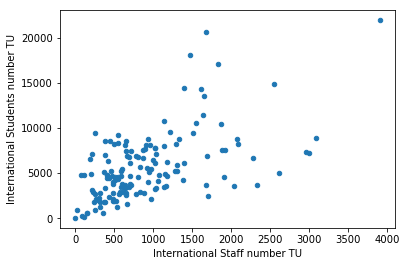

In [202]:
df_merged.plot.scatter(x='International Staff number TU', y='International Students number TU')

*Interpretation:* Between those indicators there exists a medium positive linear relationship, indicating that the number of international staff also increases the number of international students. However, it might be that there is an underlying factor influencing both, e.g. university size, location, teached subjects or international ranking.

### 2. Do international students tend to chose higher raked universities?

For this question we take a closer look at the rank and the ratio of international students provided in the Times Higher Education ranking. We again support our analysis by a scatter plot: 

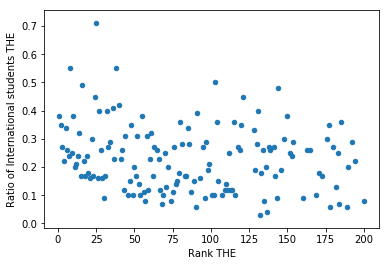

In [203]:
df_merged.plot.scatter(x='Rank THE', y='Ratio of International students THE')

*Interpretation:* There is a small negative linear correlation. Note that a smaller rank is higher up, i.e. better. Therefore a negative correlation means that universities higher up in the ranking have a higher ratio of international students. Closer inspection of the scatter plot indicates that this relationship is influenced by outliers, universities that have a high number of international students and small rank. Most noticeable, the London School of Economics and Political Science has a rank of 25 and 71% of international students. Ignoring those outliers, no relationship between these two indicators could be detected.

### 3. How similar are the ranks assigned by the two rankings?

We use the same approach as above to compare the ranks:

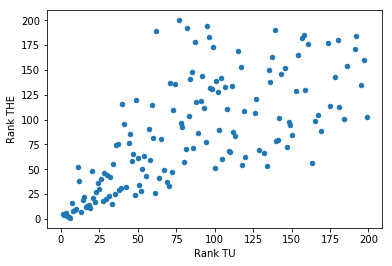

In [198]:
df_merged.plot.scatter(x='Rank TU', y='Rank THE')

*Interpretation:* These variables exhibit a positive medium linear correlation. Especially, universities higher up, i.e. with small rank, in the Top Universities ranking also are higher up in the Times Higher Education ranking, whereas variation in creases with higher rank. There are quite a few universitites where there is a clear discrepancy between the ranks. For example, the University of Minnesota has rank 163 in the Top Universities ranking and rank 56 in the Times Higher Education ranking. A further analysis of this example could provide insights into the different approaches for the rank computation.

### 4. Is the performance in researching related to the performance in teaching?

For this analysis we compare the reserch and the teaching score provided by the Times Higher Education ranking.

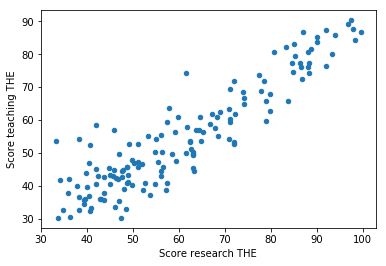

In [204]:
df_merged.plot.scatter(x='Score research THE', y='Score teaching THE')

*Interpretation:* These scores are nearly perfectly (positive) linearly correlated, meaning that universities with a high research score show a nearly equally high teaching score. As we do not know how exactly those scores are computed, it is difficult to draw concrete conclusions from this result. Interestingly, as can be concluded from the following scatter plot, there is no clear relationship between the teaching score and the ratio between students and staff.

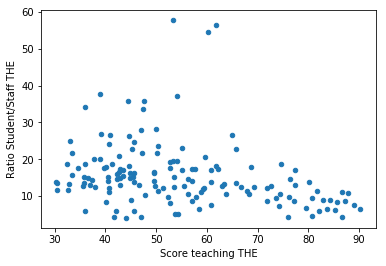

In [205]:
df_merged.plot.scatter(x='Score teaching THE', y='Ratio Student/Staff THE')

# Task 5 - Finding the best university 

In [ ]:
#use sum of two ranks?